Code used to measure the average membrane composition around a TMD

Jan Steinkühler <jst@tf.uni-kiel.de>

Paper Preprint: https://www.biorxiv.org/content/10.1101/2022.06.01.494374v1.abstract


In [ ]:
import MDAnalysis as md
import numpy as np
import matplotlib.pyplot as plt
def get_envr (gro,xtc):
    u=md.Universe(gro,xtc)
    data = []
    skip=int(len(u.trajectory)*0.8)
    for ts in u.trajectory[skip::1]:
        #selection = u.select_atoms("(cyzone 20 20 -20 protein) and not (protein or resname W)").residues
        selection = u.select_atoms("(cyzone 17 20 -20 protein) and not (protein or resname W)").residues
        unique, counts = np.unique(selection.resnames, return_counts=True)
        names=dict(zip(unique, counts))
        N=names['DYPC']+names['DPPC']+names['CHOL']
        a=np.array([names['DYPC'],names['DPPC'],names['CHOL']])
        comp=np.divide(a,N)
        data = np.append(data,comp)
    return data.reshape(int(len(data)/3),3)

In [4]:
PL422m=[]#DPPC:DYPC:CHOL=0.42:0.28:0.3
PL422s=[]

In [5]:
for i in range(4):
    data=get_envr("/Volumes/TOSHIBA EXT/md/PhS-PL422-DYPC/prod.gro",
             f"/Volumes/TOSHIBA EXT/md/PhS-PL422-DYPC/traj/prod.{i}.xtc")
    PL422m.append(np.mean(data,axis=0))
    PL422s.append(np.std(data,axis=0))

In [6]:
PL422m

[array([0.62947568, 0.12119671, 0.2493276 ]),
 array([0.5200468 , 0.19901865, 0.28093456]),
 array([0.51423745, 0.21230533, 0.27345722]),
 array([0.49783173, 0.24415791, 0.25801036])]

In [7]:
PL209m=[]#DPPC:DYPC:CHOL=0.42:0.28:0.3
PL209s=[]

In [8]:
for i in range(4):
    data=get_envr("/Volumes/TOSHIBA EXT/md/PhS-PL209-DYPC/prod.gro",
             f"/Volumes/TOSHIBA EXT/md/PhS-PL209-DYPC/traj/prod.{i}.xtc")
    PL209m.append(np.mean(data,axis=0))
    PL209s.append(np.std(data,axis=0))

In [10]:
np.array(PL209m)-[0.28,0.42,0.3]#DPPC:DYPC:CHOL=0.42:0.28:0.3

array([[ 0.06238733, -0.17466122,  0.11227389],
       [ 0.0316702 , -0.06915344,  0.03748323],
       [ 0.05699418, -0.06852254,  0.01152837],
       [ 0.0716166 , -0.13156162,  0.05994502]])

In [44]:
PL209m

[array([0.33163604, 0.20476842, 0.46359554]),
 array([0.29641953, 0.32413999, 0.37944049]),
 array([0.33434114, 0.33586708, 0.32979178]),
 array([0.3384806 , 0.24871254, 0.41280686])]

In [15]:
T

array([21.85, 31.5 , 39.  , 47.  ])

In [22]:
PL209m

[array([0.34238733, 0.24533878, 0.41227389]),
 array([0.3116702 , 0.35084656, 0.33748323]),
 array([0.33699418, 0.35147746, 0.31152837]),
 array([0.3516166 , 0.28843838, 0.35994502])]

In [23]:
PL209s

[array([0.04550742, 0.04046778, 0.05218759]),
 array([0.0592652 , 0.06974118, 0.05798422]),
 array([0.07673208, 0.09643541, 0.05700864]),
 array([0.06387639, 0.05681482, 0.03593928])]

In [24]:
PL422m

[array([0.62947568, 0.12119671, 0.2493276 ]),
 array([0.5200468 , 0.19901865, 0.28093456]),
 array([0.51423745, 0.21230533, 0.27345722]),
 array([0.49783173, 0.24415791, 0.25801036])]

In [25]:
PL422s

[array([0.05608765, 0.04333385, 0.03871308]),
 array([0.05945345, 0.05818144, 0.05298658]),
 array([0.05540508, 0.04829882, 0.04163173]),
 array([0.06136993, 0.06439505, 0.04026147])]

In [35]:
diff=np.subtract(PL209m,PL422m)

In [38]:
np.linalg.norm(np.array(diff),axis=1)

array([0.35267899, 0.26395127, 0.22854643, 0.1836581 ])

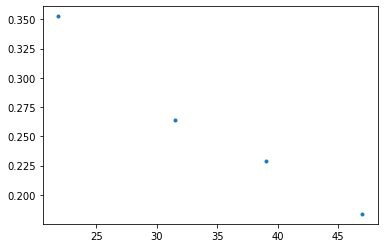

In [40]:
plt.plot(T,np.linalg.norm(np.array(diff),axis=1),'.')